<a href="https://colab.research.google.com/github/RevazRevazashvili/DataScience_learning/blob/main/most_requested_jobs_based_on_HRge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import matplotlib.pyplot as plt
import re

# get webpage

In [60]:
j = 1
jobs = []
companys = []
while j <= 4:
  url = f'https://www.hr.ge/search-posting?c=%5B212,208,209,692,214,211,207,210,213,232,218,230,219,236,220,226,642,221,235,231,222,223,646,238,237,234,224,225,227,239,229,215,228,216,233,217,90,95,99,91,121,92,668,667,94,115,114,96,119,97,98,113,100,101,93,102,103,104,118,105,106,107,117,116,108,109,110,120,111,112,669,88,89%5D&pg={j}&cc=273'

  response = requests.get(url)

  page = bs(response.text, 'html.parser')

  jobs_list = page.select('div>app-announcement-item>div>div>a>div')
  company_list = page.select('div>app-announcement-item>div>div> div>a')

  for i in range(len(jobs_list)):
    if jobs_list[i].text == '':
      continue
    else:
      jobs.append(jobs_list[i].text)

  for i in range(len(company_list)):
    if company_list[i].text == '':
      continue
    else:
      companys.append(company_list[i].text)

  j += 1

In [77]:
for job in jobs:
  if job == '\n\n' or '':
    jobs.remove(job)

341

In [79]:
for company in companys:
  if job == '\n\n' or '':
    companys.remove(company)

337

In [103]:
jobsdict = {}
companysdict = {}
for job in jobs:
  if job in jobsdict.keys():
    jobsdict[job] += 1
    continue
  else:
    jobsdict[job] = 1
for company in companys:
  if company in companysdict.keys():
    companysdict[company] += 1
    continue
  else:
    companysdict[company] = 1

In [108]:
jobsdict = dict((k, v) for k, v in jobsdict.items() if v > 1)

companysdict = dict((k, v) for k, v in companysdict.items() if v > 1)

In [110]:
len(jobsdict), len(companysdict)

(44, 31)

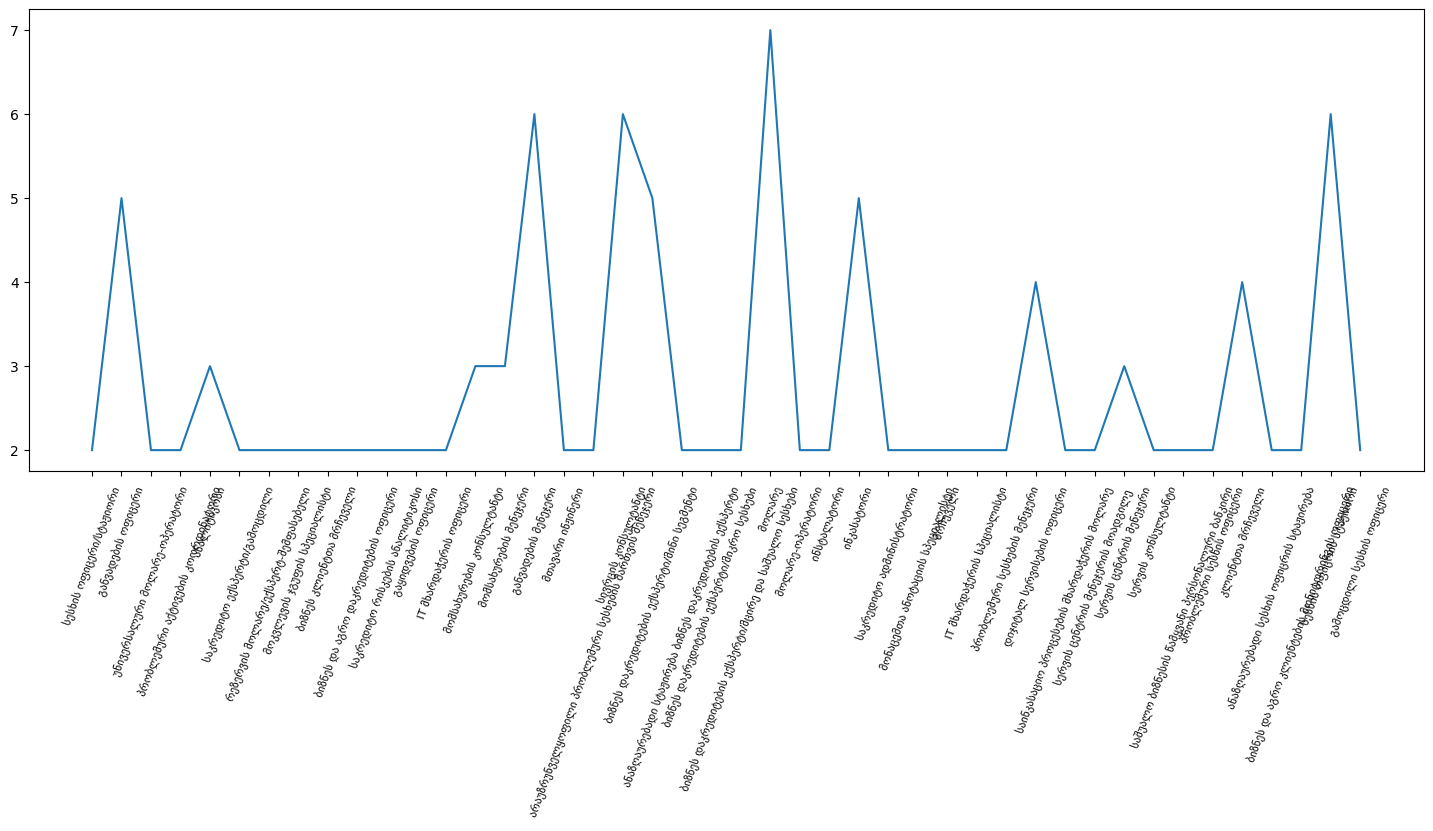

In [115]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(jobsdict.keys(), jobsdict.values())
plt.xticks(rotation=70, fontsize=8)
plt.show()

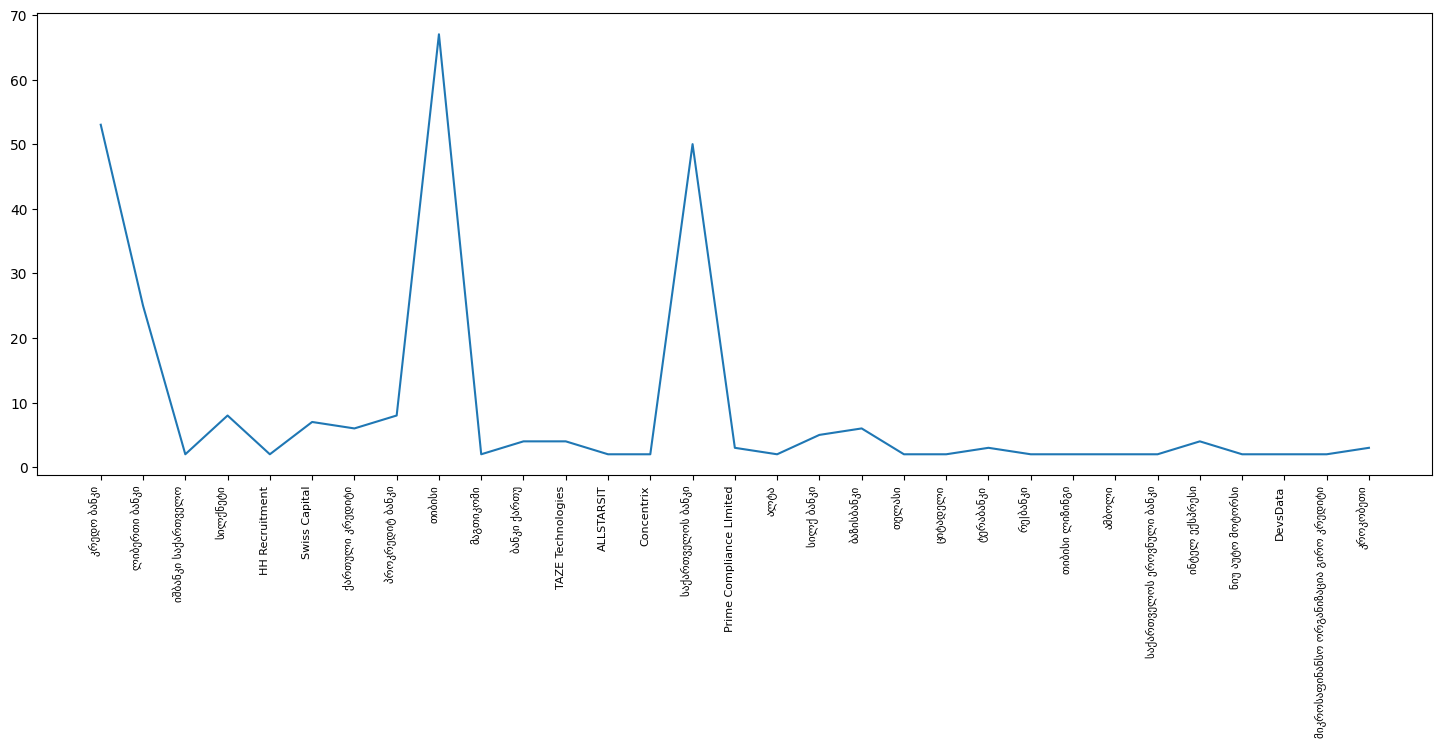

In [116]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(companysdict.keys(), companysdict.values())
plt.xticks(rotation='vertical', fontsize=8, ha='right', va='top')
plt.show()